In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Layout
import numpy as np
import starry

In [4]:
lmax = 3
map = starry.Map(lmax)
map[0, 0] = 1.0

In [27]:
slider_a = widgets.FloatSlider(
                value=0.3,
                min=0.01,
                max=1./np.sqrt(3),
                step=0.01,
                description=r'$a$',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='.2f',
                layout=Layout(width='40%')
            )

slider_b = widgets.FloatSlider(
                value=0.0,
                min=-1.00,
                max=1.00,
                step=0.01,
                description=r'$b$',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='.2f',
                layout=Layout(width='40%')
            )

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

def visualize_func(a=0.3, b=0.0):
    """Interactive visualization."""
    
    # Set the coeffs
    map[1, 0] = a
    map[2, 0] = -a * b / np.sqrt(15)
    
    # Check if physical
    if b > np.sqrt(3) / a - 3:
        slider_a.style.handle_color = "#FF0000"
        slider_b.style.handle_color = "#FF0000"
    else:
        slider_a.style.handle_color = "#FFFFFF"
        slider_b.style.handle_color = "#FFFFFF"
    
    # Compute the intensity profile
    longitude = np.linspace(-180, 180, 200)
    latitude = np.linspace(-90, 90, 100)
    y = np.sin(latitude * np.pi / 180.)
    intensity = np.zeros((len(y), len(longitude)))
    for i in range(len(longitude)):
        intensity[:,i] = map(theta=longitude[i], x=0, y=y)

    # Draw the figure
    fig, ax = plt.subplots(2, 2, figsize=(14, 12))
    image = ax[1, 0].imshow(intensity, origin="lower", aspect="auto", extent=(-180, 180, -1, 1))
    ax[1, 0].set_xlabel("Longitude", fontsize=16)
    ax[1, 0].set_ylabel("Latitude", fontsize=16)
    yticks = np.array([-90, -60, -45, -30, -15, 0, 15, 30, 45, 60, 90], dtype=int)
    ax[1, 0].set_yticks(np.sin(yticks * np.pi / 180))
    ax[1, 0].set_yticklabels(yticks)
    divider = make_axes_locatable(ax[1, 0])
    cax = divider.append_axes('right', size='3%', pad=0.05)
    plt.colorbar(image, cax=cax)

    # Longitudinal profile
    Ilon = np.sum(intensity, axis=0)
    Ilon /= np.max(Ilon)
    Ieq = np.array(intensity[len(y) // 2])
    Ieq /= np.max(Ieq)
    l_ilon, = ax[0, 0].plot(longitude, Ilon, label="Latitudinally integrated", color=color_cycle[0])
    l_ieq, = ax[0, 0].plot(longitude, Ieq, label="Equatorial", color=color_cycle[1])
    ax[0, 0].set_xlabel("Longitude", fontsize=16)
    ax[0, 0].set_ylabel("Intensity", fontsize=16)
    ax[0, 0].legend(fontsize=10, loc="lower left")
    ax[0, 0].set_ylim(0, 1.1)
    ax[0, 0].set_xlim(-180, 180)

    # Latitudinal profile
    Ilat = np.sum(intensity, axis=1)
    Ilat /= np.max(Ilat)
    Imer = np.array(intensity[:, len(longitude) // 2])
    Imer /= np.max(Imer)
    l_ilat, = ax[1, 1].plot(Ilat, latitude, label="Longitudinally integrated", color=color_cycle[0])
    l_ieq, = ax[1, 1].plot(Imer, latitude, label="Meridional", color=color_cycle[1])
    ax[1, 1].set_xlabel("Intensity", fontsize=16)
    ax[1, 1].set_ylabel("Latitude", fontsize=16)
    ax[1, 1].yaxis.tick_right()
    ax[1, 1].yaxis.set_label_position("right")
    ax[1, 1].legend(fontsize=10, loc="lower left")
    ax[1, 1].set_xlim(0, 1.1)
    ax[1, 1].set_ylim(-90, 90)

    # Hide fourth axis
    ax[0, 1].axis('off');


def visualize():
    return interact(visualize_func, a=slider_a, b=slider_b)

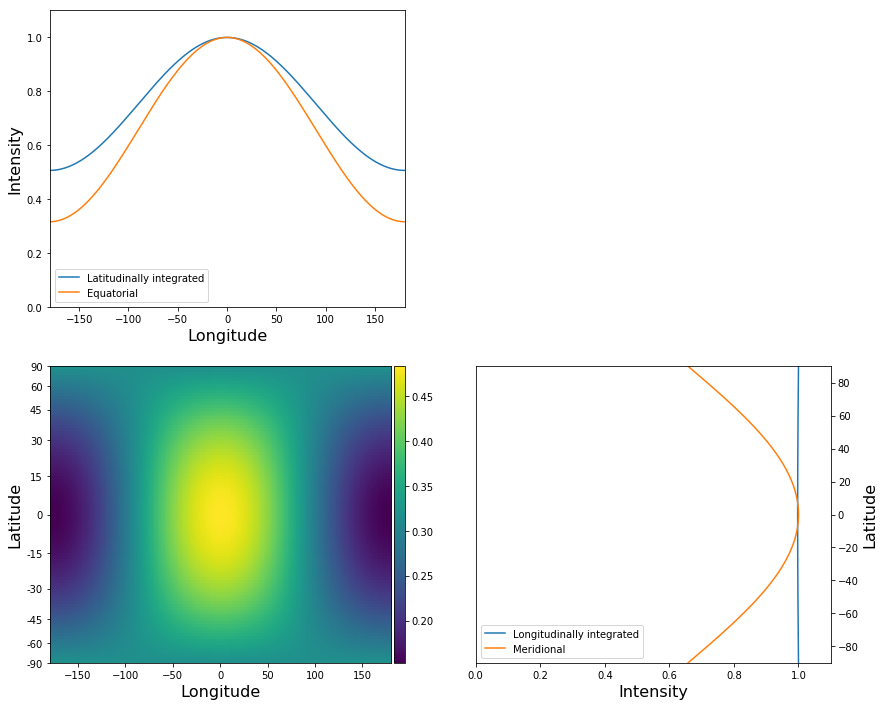

In [28]:
visualize();